In [2]:
#Importing libraries and packages
from operator import index
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb

print ('Setup complete.....')

Setup complete.....


In [3]:
#Loading data
pd.set_option("display.max_columns", None)
training_data = pd.read_csv(r'E:\Titanic\titanic.csv\train.csv')
testing_data =  pd.read_csv(r'E:\Titanic\titanic.csv\test.csv')
training_data['train_test'] = 1
testing_data['train_test'] = 0
testing_data['Survived'] = np.NaN
all_data = pd.concat([training_data,testing_data])
#print('Testing columns are: ',testing_data.describe().columns)


In [4]:
#Looking at numerical and categorical data separately
df_num = training_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training_data[['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']]
print('Training data is: ',training_data.describe().columns)


Training data is:  Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')


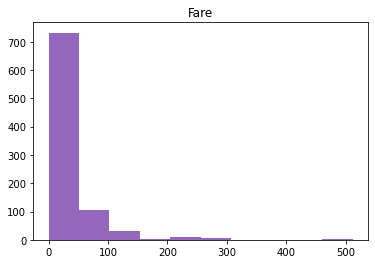

In [5]:
#Distrinutions for numeric data
for i in df_num.columns:
    plt.hist (df_num[i])
    plt.title(i)
    #plt.show()    


          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age    -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp   0.083081 -0.308247  1.000000  0.414838  0.159651
Parch   0.018443 -0.189119  0.414838  1.000000  0.216225
Fare   -0.549500  0.096067  0.159651  0.216225  1.000000
                Age       Fare     Parch    Pclass     SibSp
Survived                                                    
0         30.626179  22.117887  0.329690  2.531876  0.553734
1         28.343690  48.395408  0.464912  1.950292  0.473684


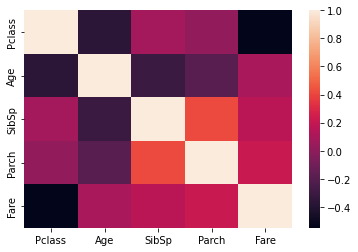

In [6]:
#Correlations
print(df_num.corr())
sns.heatmap(df_num.corr())
#plt.show()
print(pd.pivot_table(training_data, index='Survived', values=['Pclass','Age','SibSp','Parch','Fare']))


In [7]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(training_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


c:\Users\Donald\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


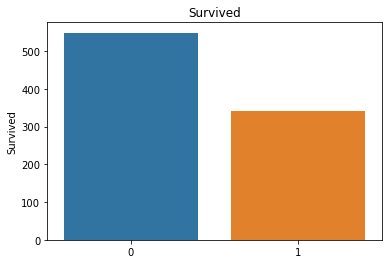

c:\Users\Donald\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


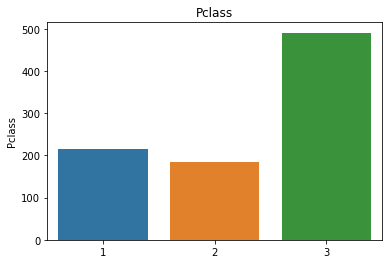

c:\Users\Donald\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


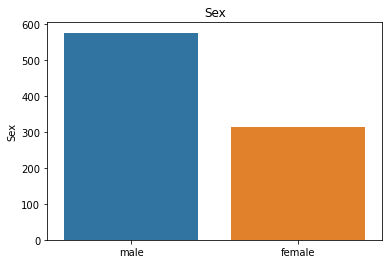

c:\Users\Donald\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


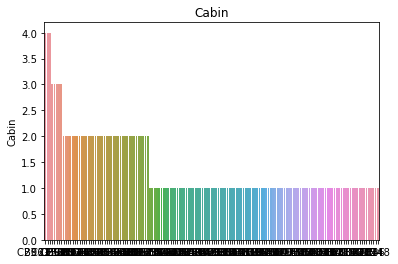

c:\Users\Donald\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


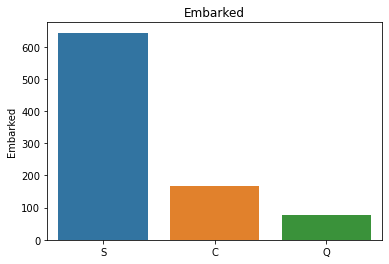

In [8]:
#Distribution for categorical data
for i in df_cat.columns:
   sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
   plt.show()


In [9]:
print(pd.pivot_table(training_data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training_data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training_data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [10]:
df_cat.Cabin
training_data['cabin_multiple'] = training_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
training_data['cabin_multiple'].value_counts()
pd.pivot_table(training_data, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category


cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [11]:
training_data['cabin_adv'] = training_data.Cabin.apply(lambda x: str(x)[0])
#comparing surivial rate by cabin
print(training_data.cabin_adv.value_counts())
pd.pivot_table(training_data,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')
#understand ticket values better 


n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [12]:
#numeric vs non numeric 
training_data['numeric_ticket'] = training_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training_data['ticket_letters'] = training_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
training_data['numeric_ticket'].value_counts()


1    661
0    230
Name: numeric_ticket, dtype: int64

In [13]:
#Viewing lettered tickets
#pd.set_option('max_rows', None)
training_data['ticket_letters'].value_counts()
#Survival rate by numeric ticket


0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [14]:
pd.pivot_table(training_data,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')
#Survival rate by lettered ticket
pd.pivot_table(training_data,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')


ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,pc,pp,ppp,sc,sca4,scah,scahbasle,scow,scparis,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,21.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,6.0,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,39.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,5.0,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


Ticket type does not play as major a role



In [15]:
#Determining if there is a correlation between Title and survival
training_data.Name.head(50)
training_data['Name_Title'] = training_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training_data['Name_Title'].value_counts()
pd.pivot_table(training_data,index='Survived',columns='Name_Title', values = 'Name', aggfunc='count')


Name_Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


Next is modelling pre-processing




(889,)

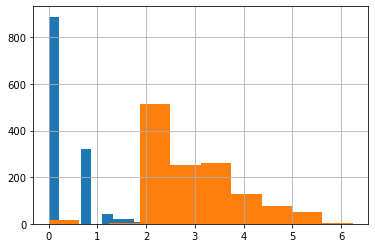

In [16]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(training_data.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training_data.Fare.median())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)

#tried log norm of sibsp (not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape


In [17]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [19]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())


[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [20]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())


[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807
[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [21]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())


[0.76966292 0.80337079 0.80898876 0.82022472 0.85310734]
0.8110709071288008


In [22]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())


[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [23]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())


[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [24]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1, use_label_encoder=False)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())


[14:27:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [25]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())



[14:27:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [27]:
#Simple performance reporting function
def clf_performannce(classifier, model_name):
    print(model_name)
    print('Best score: ' + str(classifier.best_score_))
    print('Best Parameters: '+ str(classifier.best_params_))
    
    

In [28]:
lr = LogisticRegression()
param_grid = {
    'max_iter' : [2000],
    'penalty' : ['11','12'],
    'C' : np.logspace(-4,4,20),
    'solver' : ['liblinear']
}
clf_lr= GridSearchCV(lr, param_grid=param_grid, cv = 5, verbose=True, n_jobs = 1)
best_clf_lr = clf_lr.fit(X_test_scaled,y_train)
clf_performannce(best_clf_lr,'Logitistic Regressor')

ValueError: Found input variables with inconsistent numbers of samples: [418, 889]